# 4. descriptive visualization and modelling using the station-level dataset

In [56]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import 'station2.csv' from merge2.ipynb
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/divvy_data/data/stations2.csv')
df = df.drop(columns='Unnamed: 0')

#create a new feature: weekeday proportion
df['weekday_p'] = 1 - df['weekend_p']

In [ ]:
# select only the dependent variable 'total_count'
# and the predictor variables used in the modelling
dfv = df[['total_count', 'casual_p', 'average_distance',
          'weekday_p', 'morning_p', 'evening_p', 
        'num_phys_crime', 'num_wc_crime', 'num_bike_stations', 'population_density', 
        'min_dis_rail_station', 'num_bus_stop', 
       'average_home_value', 'black_p', 'asian_p', 'latinx_p', 'white_p',
       'age18_29_p', 'age30_39_p', 'age40_49_p', 'age50_59_p', 'age65_p']]

In [ ]:
#generate a summary table
summary_table = dfv.describe().T
#summary_table.to_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/divvy_data/data/summary_table.csv')

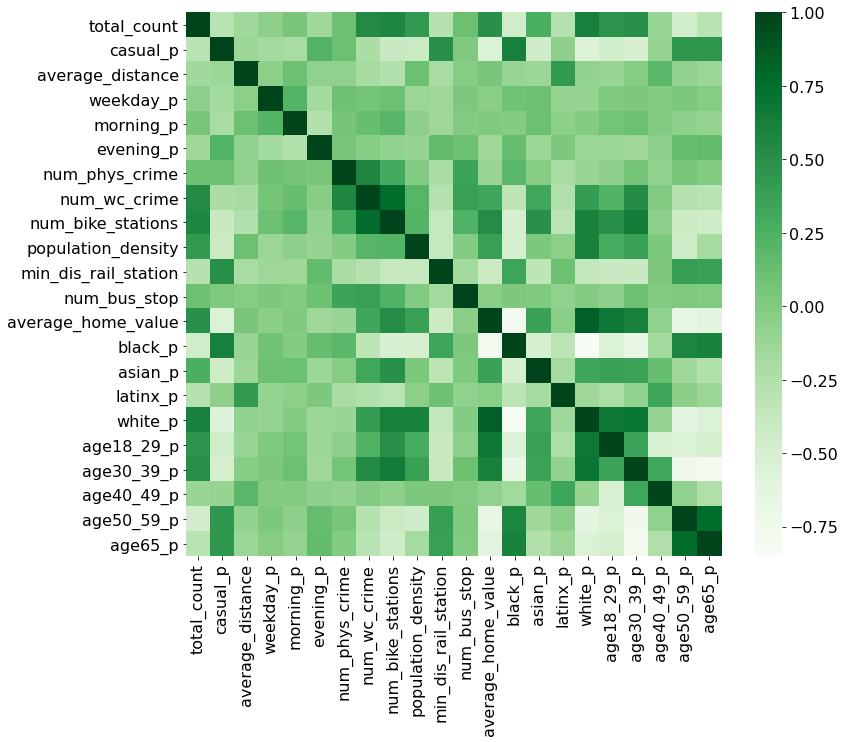

In [ ]:
#visualize correlation heatmap of all variables
plt.figure(figsize=(12, 10))
plt.rcParams['font.size'] = '16'
sns.heatmap(dfv.corr(), cmap='Greens')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Deep Learning/divvy_data/figures/p7.png', dpi=150, bbox_inches='tight')


In [ ]:
dfv.head(2)

,total_count,end_percent,classic_bike_p,ebike_p,casual_p,weekend_p,morning_p,evening_p,average_distance,num_phys_crime,num_wc_crime,min_dis_rail_station,num_bus_stop,num_bike_stations,population_density,housing_occupancy_rate,median_household_income,average_home_value,black_p,asian_p,latinx_p,white_p,age18_29_p,age30_39_p,age40_49_p,age50_59_p,age65_p
0,7109,0.485863,0.621705,0.099414,0.748129,0.503254,0.135861,0.060364,0.021677,4,29,0.009466,0,10,28793.0,0.784152,95556.0,445321.0,0.042299,0.189551,0.081151,0.658954,0.345223,0.185374,0.138567,0.064311,0.139826
1,6563,0.495200,0.650043,0.103365,0.693529,0.471613,0.178085,0.035548,0.025414,1,37,0.015990,4,6,28793.0,0.784152,95556.0,445321.0,0.042299,0.189551,0.081151,0.658954,0.345223,0.185374,0.138567,0.064311,0.139826


## create histograms of all variables by hypothesis groups

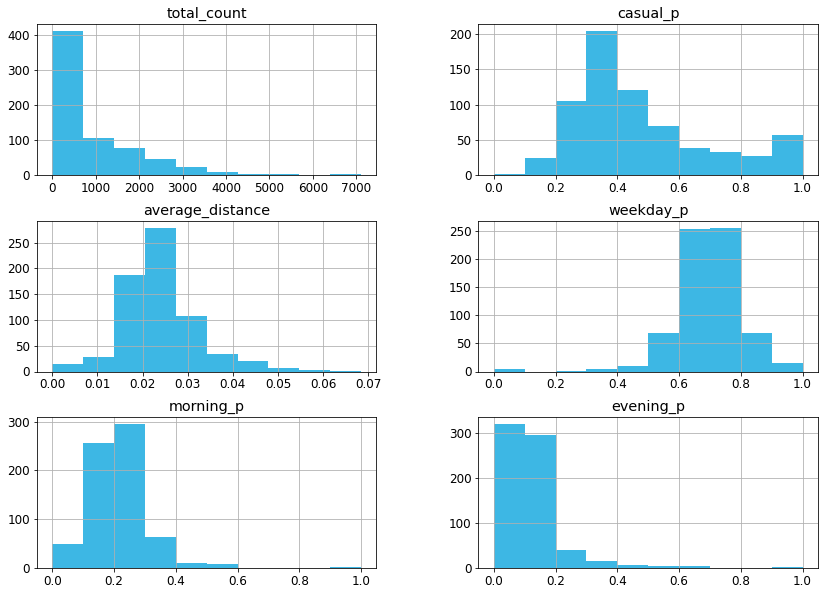

In [ ]:
#hypothesis group 1: location
plt.rcParams['font.size'] = '12'
dfv.hist(column = ['total_count', 'casual_p', 'average_distance',
                    'weekday_p', 'morning_p', 'evening_p'], color ='#3DB7E4', figsize=(14, 10))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Deep Learning/divvy_data/figures/p1.png', dpi=150, bbox_inches='tight')

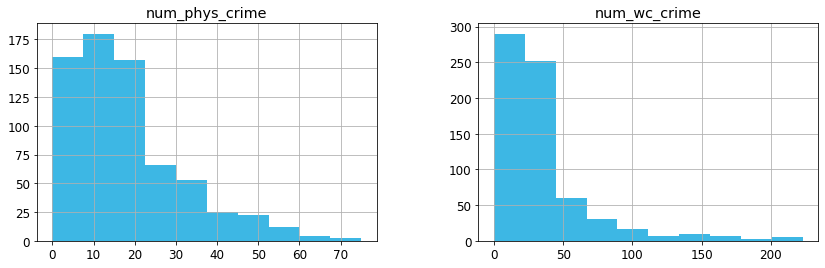

In [ ]:
#hypothesis group 2: crime
dfv.hist(column = ['num_phys_crime', 'num_wc_crime'], color ='#3DB7E4', figsize=(14, 4))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Deep Learning/divvy_data/figures/p2.png', dpi=150, bbox_inches='tight')

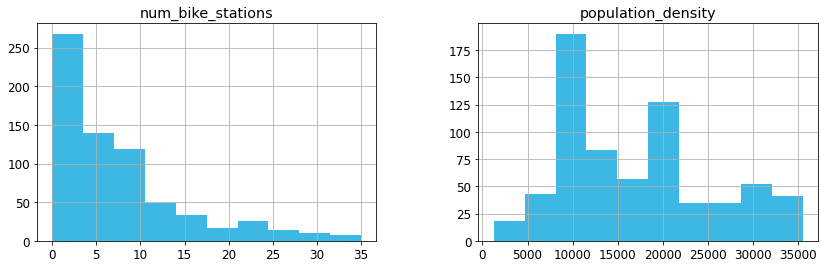

In [ ]:
#hypothesis group 3: supply and demand
dfv.hist(column = ['num_bike_stations', 'population_density'], color ='#3DB7E4', figsize=(14, 4))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Deep Learning/divvy_data/figures/p3.png', dpi=150, bbox_inches='tight')

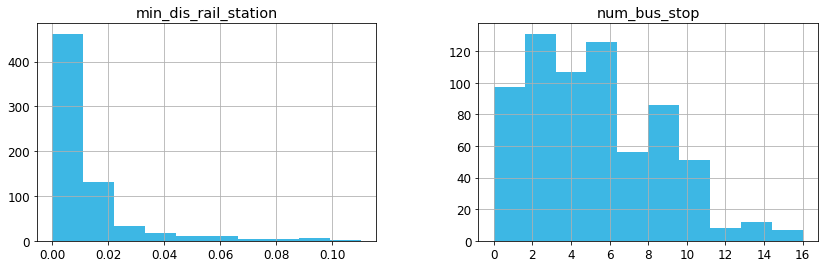

In [ ]:
#hypothesis group 4: other public transportations

dfv.hist(column = ['min_dis_rail_station', 'num_bus_stop'],color ='#3DB7E4', figsize=(14, 4))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Deep Learning/divvy_data/figures/p4.png', dpi=150, bbox_inches='tight')

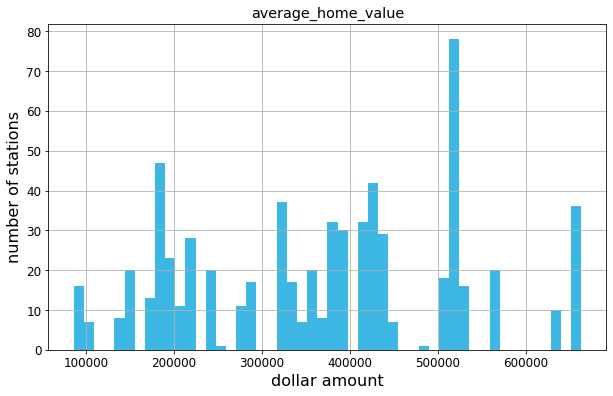

In [ ]:
#hypothesis group 5: socio-economic status
dfv.hist(column = ['average_home_value'],color ='#3DB7E4', figsize=(10, 6), bins=50)
plt.xlabel('dollar amount', fontsize=16)
plt.ylabel('number of stations', fontsize=16)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Deep Learning/divvy_data/figures/p5.png', dpi=150, bbox_inches='tight')

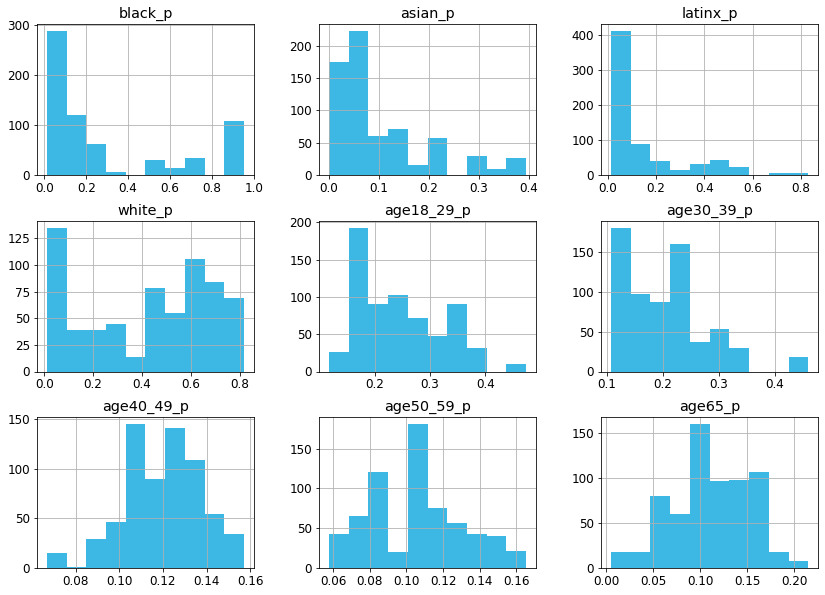

In [ ]:
#hypothesis group 6: demographics
dfv.hist(column = ['black_p', 'asian_p', 'latinx_p', 'white_p',
       'age18_29_p', 'age30_39_p', 'age40_49_p', 'age50_59_p', 'age65_p'], color ='#3DB7E4',figsize=(14, 10))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Deep Learning/divvy_data/figures/p6.png', dpi=150, bbox_inches='tight')

## Modelling

In [ ]:
#add a very small number of every feature, so that no value will be 0.
dfv.loc[:,'ebike_p'] = df.loc[:,'ebike_p'] + 0.00001
dfv.loc[:,'casual_p'] = df.loc[:,'casual_p'] + 0.00001
dfv.loc[:,'weekday_p'] = df.loc[:,'weekday_p'] + 0.00001
dfv.loc[:,'morning_p'] = df.loc[:,'morning_p'] + 0.00001
dfv.loc[:,'evening_p'] = df.loc[:,'evening_p'] + 0.00001
dfv.loc[:,'black_p'] = df.loc[:,'black_p'] + 0.00001
dfv.loc[:,'asian_p'] = df.loc[:,'asian_p'] + 0.00001
dfv.loc[:,'latinx_p'] = df.loc[:,'latinx_p'] + 0.00001
dfv.loc[:,'white_p'] = df.loc[:,'white_p'] + 0.00001
dfv.loc[:,'age18_29_p'] = df.loc[:,'age18_29_p'] + 0.00001
dfv.loc[:,'age30_39_p'] = df.loc[:,'age30_39_p'] + 0.00001
dfv.loc[:,'age40_49_p'] = df.loc[:,'age40_49_p'] + 0.00001
dfv.loc[:,'age50_59_p'] = df.loc[:,'age50_59_p'] + 0.00001
dfv.loc[:,'age65_p'] = df.loc[:,'age65_p'] + 0.00001

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#add a very small number of every feature, so that no value will be 0.
dfv.loc[:,'num_phys_crime'] = df.loc[:,'num_phys_crime'] + 0.001
dfv.loc[:,'num_wc_crime'] = df.loc[:,'num_wc_crime'] + 0.001
dfv.loc[:,'num_bus_stop'] = df.loc[:,'num_bus_stop'] + 0.001
dfv.loc[:,'num_bike_stations'] = df.loc[:,'num_bike_stations'] + 0.001
dfv.loc[:,'population_density'] = df.loc[:,'population_density'] + 0.001
dfv.loc[:,'average_distance'] = df.loc[:,'average_distance'] + 0.00000001

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
# model (1) will all predictor variables
formula = 'np.log(total_count) ~ np.log(casual_p) + np.log(average_distance) +\
          np.log(weekday_p) + np.log(morning_p)  + np.log(evening_p) +\
          np.log(num_phys_crime) + np.log(num_wc_crime) + np.log(num_bike_stations) + np.log(population_density) +\
          np.log(min_dis_rail_station) + np.log(num_bus_stop)  +\
          np.power(np.log(average_home_value), 2) + np.log(average_home_value) +\
          np.log(black_p) + np.log(asian_p) + np.log(latinx_p) + np.log(white_p) +\
          np.log(age18_29_p) + np.log(age30_39_p) + np.log(age40_49_p) + np.log(age50_59_p) + np.log(age65_p)'

mod = smf.ols(formula=formula, data=dfv)
res1 = mod.fit()
print(res1.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(total_count)   R-squared:                       0.761
Model:                             OLS   Adj. R-squared:                  0.753
Method:                  Least Squares   F-statistic:                     92.66
Date:                 Wed, 09 Jun 2021   Prob (F-statistic):          3.78e-182
Time:                         01:09:45   Log-Likelihood:                -889.40
No. Observations:                  662   AIC:                             1825.
Df Residuals:                      639   BIC:                             1928.
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [ ]:
# model (2) with only the predictor variables with significant p values (p<0.1).

formula = 'np.log(total_count) ~ np.log(average_distance) + np.log(weekday_p) + np.log(morning_p) + np.log(evening_p)  +\
          np.log(num_phys_crime) + np.log(num_wc_crime) +\
          np.log(num_bike_stations) + np.log(population_density) +\
          np.power(np.log(average_home_value), 2) + np.log(average_home_value) +\
          np.log(asian_p) + np.log(latinx_p) + np.log(white_p) +\
          np.log(age18_29_p) + np.log(age30_39_p)'

mod = smf.ols(formula=formula, data=dfv)
res2 = mod.fit()
print(res2.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(total_count)   R-squared:                       0.757
Model:                             OLS   Adj. R-squared:                  0.751
Method:                  Least Squares   F-statistic:                     134.1
Date:                 Wed, 09 Jun 2021   Prob (F-statistic):          7.25e-187
Time:                         01:16:04   Log-Likelihood:                -895.42
No. Observations:                  662   AIC:                             1823.
Df Residuals:                      646   BIC:                             1895.
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

### Generate regression output table in latex

In [ ]:
#!pip install stargazer

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

In [ ]:
#set order of predictor variables shown in the regression output
covariates = ['np.log(casual_p)', 'np.log(average_distance)', 'np.log(weekday_p)',
              'np.log(morning_p)', 'np.log(evening_p)', 'np.log(num_phys_crime)', 
              'np.log(num_wc_crime)', 'np.log(num_bike_stations)', 
              'np.log(population_density)', 'np.log(min_dis_rail_station)', 
              'np.log(num_bus_stop)', 'np.power(np.log(average_home_value), 2)', 
              'np.log(average_home_value)', 'np.log(black_p)', 'np.log(asian_p)', 
              'np.log(latinx_p)', 'np.log(white_p)', 'np.log(age18_29_p)', 
              'np.log(age30_39_p)', 'np.log(age40_49_p)', 'np.log(age50_59_p)', 'np.log(age65_p)']

In [ ]:
stargazer = Stargazer([res1, res2])
stargazer.covariate_order(covariates)

In [ ]:
#export into latex
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(stargazer.render_latex())
f.write(endtex)
f.close()

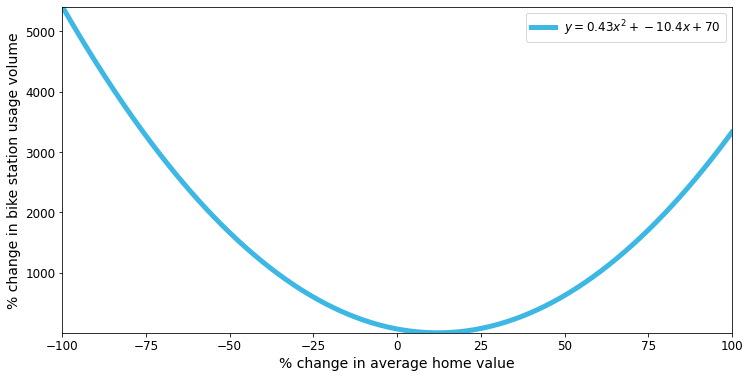

In [65]:
#drawing a graph from average home value coefficients from model (1)
import numpy as np
import matplotlib.pyplot as plt

a = 0.43
b = -10.4
c = 70
x = np.linspace(-100, 100, 256, endpoint = True)
y = (a * (x * x)) + (b * x) + c
plt.figure(figsize=(12,6))
plt.plot(x, y, color='#3DB7E4', linewidth=5, label=r'$y = 0.43x^2 + -10.4x + 70$')


axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([y.min(), y.max()])

plt.xlabel('% change in average home value', fontsize=14)
plt.ylabel('% change in bike station usage volume', fontsize=14)
plt.legend(loc='upper right')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Deep Learning/divvy_data/figures/p8.png', dpi=150, bbox_inches='tight')


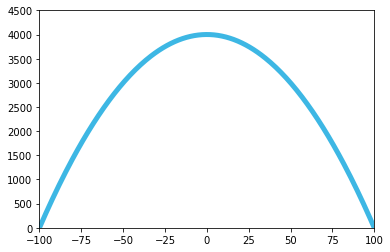

In [ ]:
#drawing a graph of my hypothesized relationship between average home value and station usage volume
import numpy as np
import matplotlib.pyplot as plt

a = -0.4
b = 0
c = 4000
x = np.linspace(-100, 100, 256, endpoint = True)
y = (a * (x * x)) + (b * x) + c

plt.plot(x, y, color='#3DB7E4', linewidth=5)
axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([y.min(), 4500])

plt.show()